<a href="https://colab.research.google.com/github/briyanyehezkhiel/Clustering_Submission_Akhir_BMLP_Briyan_Yehezkhiel/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Briyan_Yehezkhiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
display(df.corr(numeric_only=True))

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

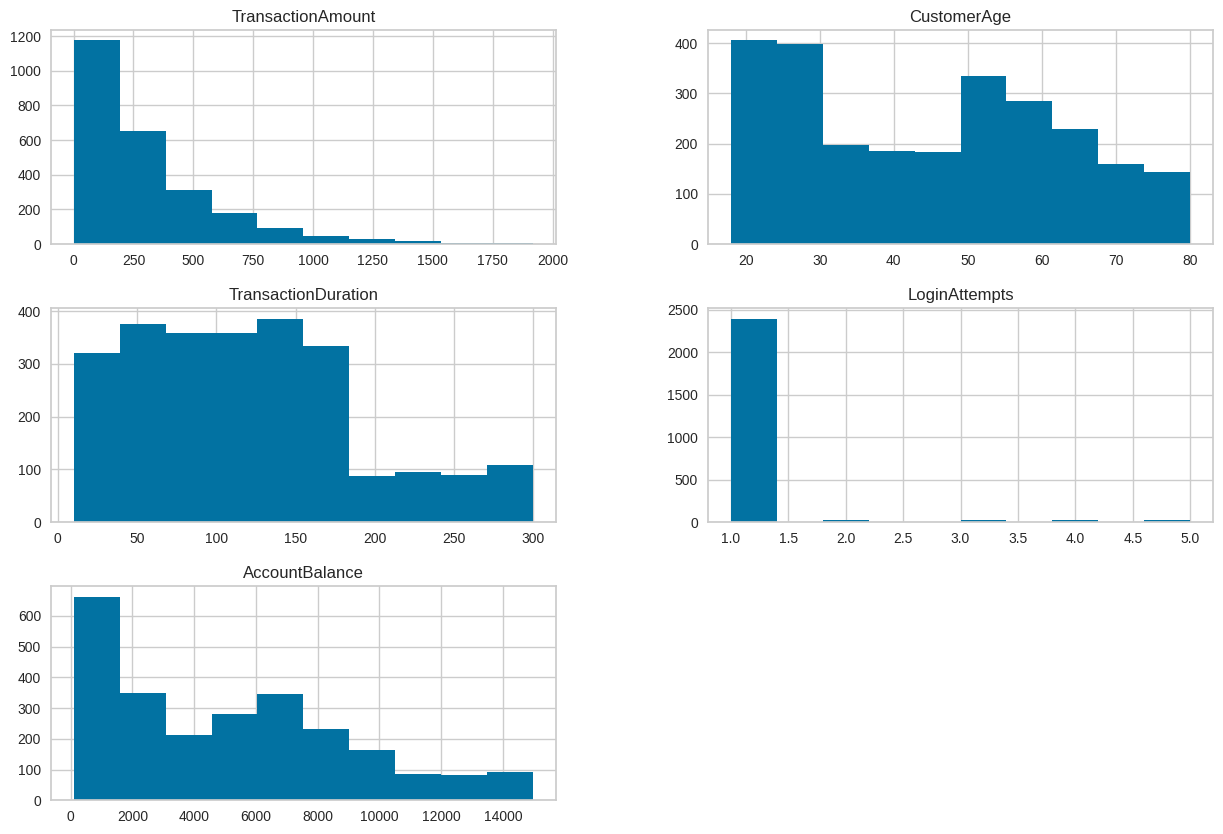

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15, 10))

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

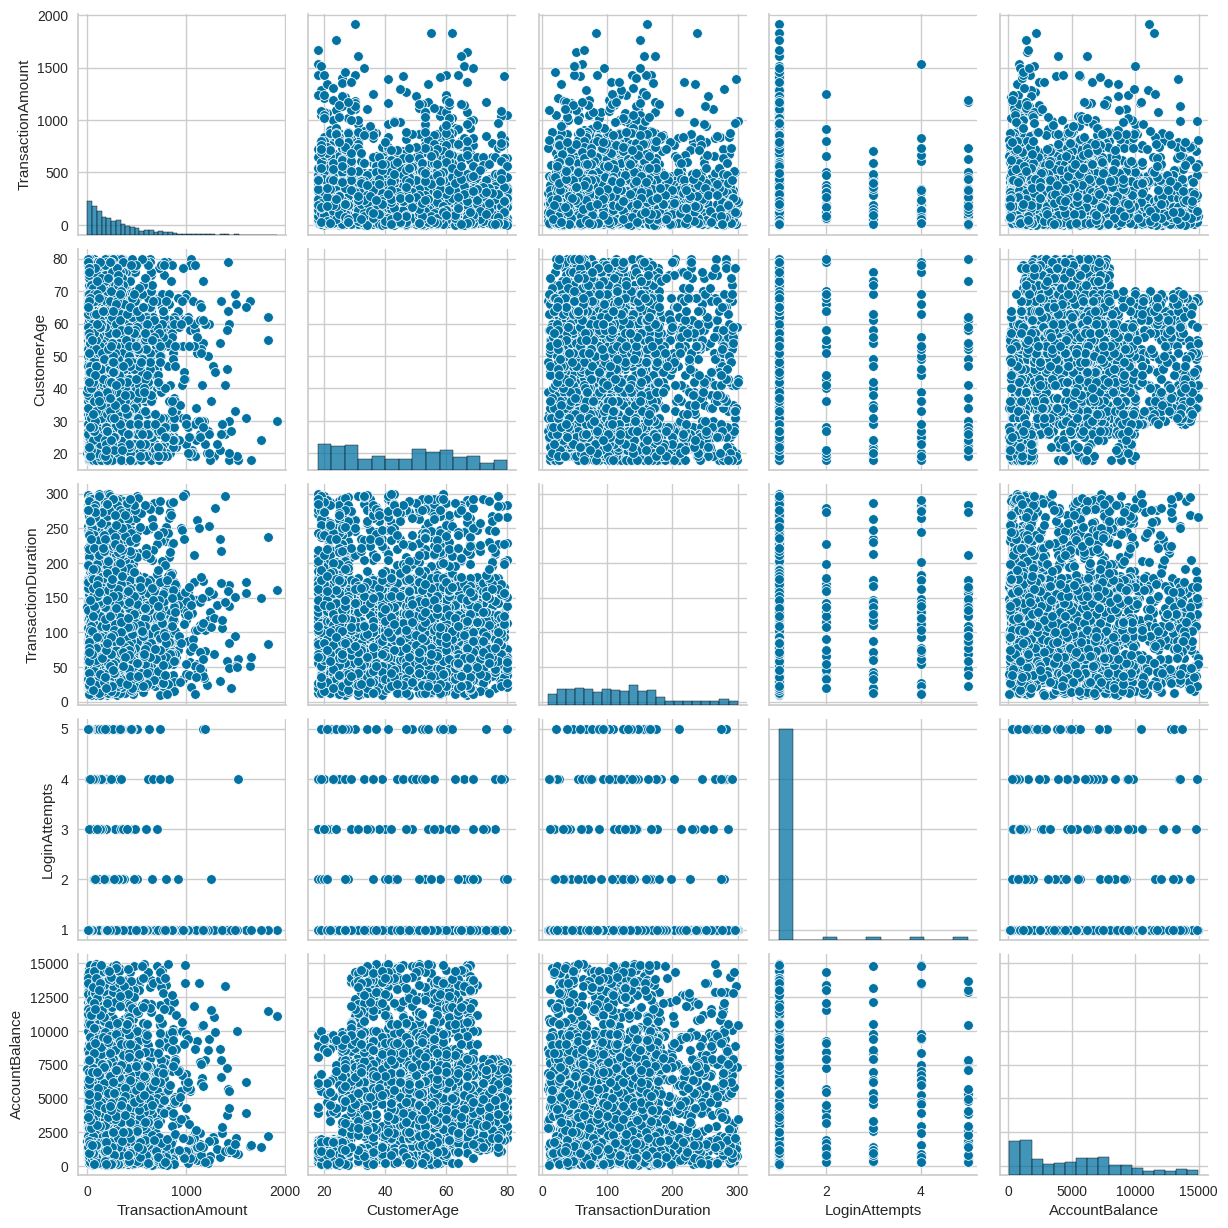

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

numerical_df = df.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numerical_df)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
cols_to_drop = [col for col in df.columns if 'ID' in col or 'IP Address' in col]
df = df.drop(columns=cols_to_drop)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

categorical_cols = df.select_dtypes(include=['object']).columns

encoders = {}

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col].astype(str))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

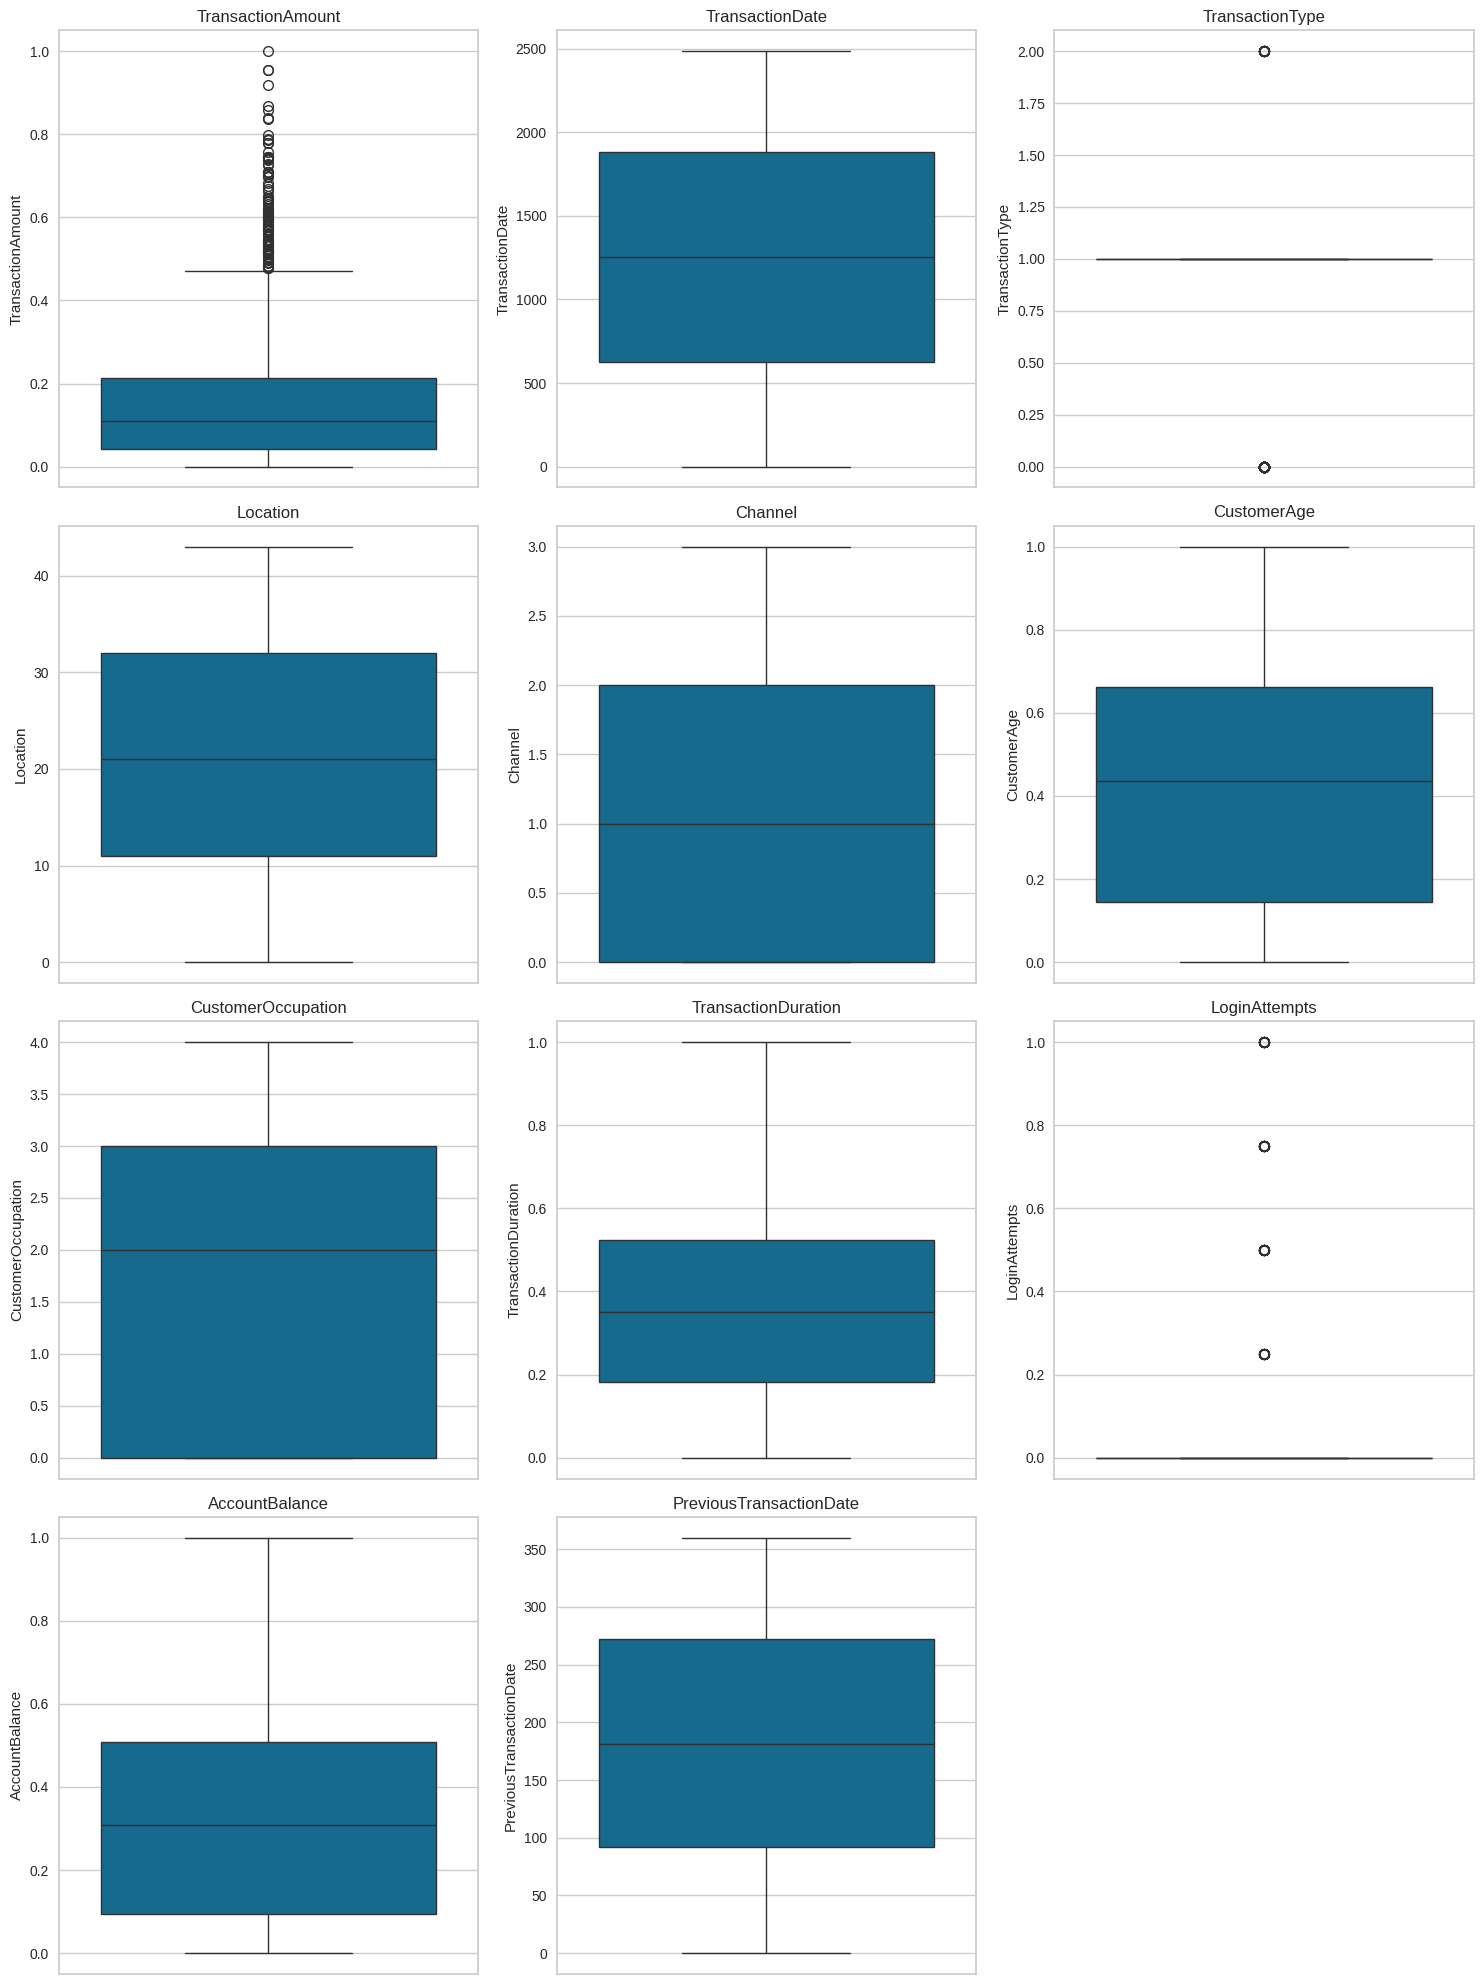

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

numerical_cols_outliers = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Target' in numerical_cols_outliers:
    numerical_cols_outliers.remove('Target')

n_cols = 3
n_rows = (len(numerical_cols_outliers) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df['TransactionAmount_Bin'] = pd.cut(df['TransactionAmount'], bins=5, labels=False)

df['CustomerAge_Bin'] = pd.cut(df['CustomerAge'], bins=5, labels=False)

label_encoder_amount = LabelEncoder()
df['TransactionAmount_Bin_Encoded'] = label_encoder_amount.fit_transform(df['TransactionAmount_Bin'].astype(str))

label_encoder_age = LabelEncoder()
df['CustomerAge_Bin_Encoded'] = label_encoder_age.fit_transform(df['CustomerAge_Bin'].astype(str))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,TransactionAmount_Bin_Encoded,CustomerAge_Bin_Encoded
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,4,0,4
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,4,0,4
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,0,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0,0,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,TransactionAmount_Bin_Encoded,CustomerAge_Bin_Encoded
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.154922,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.030025,0.335330,180.984987,0.374479,1.650542,0.374479,1.650542
std,0.151893,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.147059,0.262236,103.757245,0.703326,1.412613,0.703326,1.412613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093288,92.000000,0.000000,0.000000,0.000000,0.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308010,181.000000,0.000000,2.000000,0.000000,2.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.507822,271.750000,1.000000,3.000000,1.000000,3.000000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000,4.000000,4.000000,4.000000,4.000000


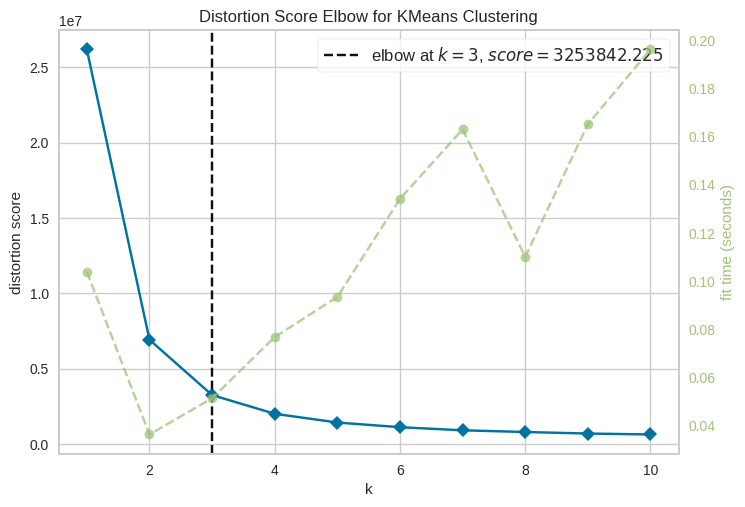

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

df_for_clustering = df.drop(columns=['TransactionDate'])

model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_for_clustering)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Assuming 3 clusters based on the elbow method plot
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.540331857233367


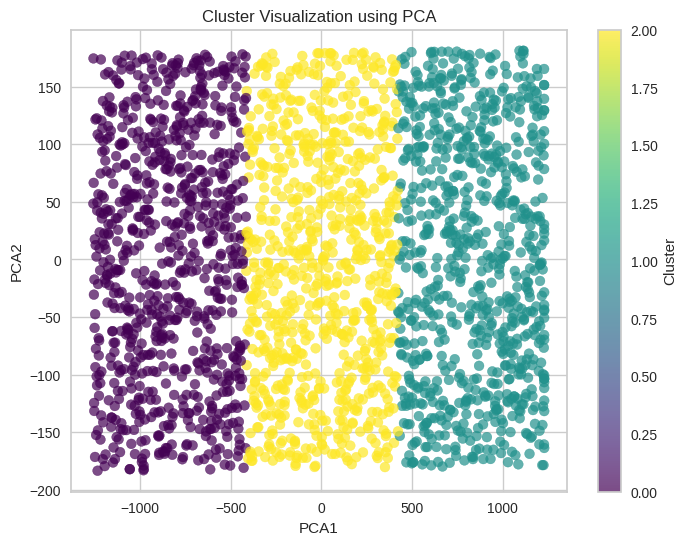

In [ ]:
# Membuat visualisasi hasil clustering

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

df_viz = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_viz['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df_viz['PCA1'], df_viz['PCA2'], c=df_viz['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

# Inisialisasi dan terapkan PCA
pca = PCA(n_components=2) # Mengurangi ke 2 komponen untuk visualisasi
df_pca = pca.fit_transform(df_for_clustering)

# Membuat dataframe baru dengan hasil PCA
df_pca_df = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])

# Membangun model KMeans baru dengan data yang telah ditransformasi oleh PCA
# Mengasumsikan 3 cluster berdasarkan Metode Elbow (atau pilih jumlah lain)
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(df_pca_df)

# Menambahkan label cluster ke dataframe PCA
df_pca_df['Cluster'] = kmeans_pca.labels_

# Menampilkan 5 baris pertama dari dataframe PCA beserta clusternya
display(df_pca_df.head())


,PCA1,PCA2,Cluster
0,-76.042478,14.293951,1
1,11.040757,-6.357942,0
2,-139.990523,1.068832,1
3,-18.031457,11.556087,0
4,-168.010050,5.955332,1


In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Menambahkan label cluster ke dalam dataframe
df['Cluster'] = kmeans.labels_

# Mengidentifikasi kolom numerik (kecuali kolom 'Cluster' yang baru ditambahkan)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Cluster' in numerical_cols:
    numerical_cols.remove('Cluster')

# Mengelompokkan berdasarkan cluster dan menghitung statistik deskriptif
cluster_analysis = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])

# Menampilkan hasil analisis
display(cluster_analysis)

TransactionAmount                     TransactionDate              \
                     mean       min       max            mean   min   max   
Cluster                                                                     
0                0.149639  0.000313  0.953561      421.517370     0   842   
1                0.157967  0.000000  0.954092     2097.861809  1680  2485   
2                0.157227  0.000031  1.000000     1260.324121   843  1679   

        TransactionType           Location  ... TransactionAmount_Bin  \
                   mean min max       mean  ...                   max   
Cluster                                     ...                         
0              0.802730   0   2  20.978908  ...                     4   
1              0.772613   0   2  21.541457  ...                     4   
2              0.790201   0   2  21.635678  ...                     4   

        CustomerAge_Bin         TransactionAmount_Bin_Encoded          \
                   mean min max                          mean min max   
Cluster                                                                 
0              1.574442   0   4                      0.344913   0   4   
1              1.634422   0   4                      0.390704   0   4   
2              1.743719   0   4                      0.388191   0   4   

        CustomerAge_Bin_Encoded          
                           mean min max  
Cluster                                  
0                      1.574442   0   4  
1                      1.634422   0   4  
2                      1.743719   0   4  

[3 rows x 45 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

Berikut adalah interpretasi karakteristik tiap cluster berdasarkan rata-rata fitur numerik sebelum dan sesudah inverse transform:

1.  **Cluster 0: (Nasabah dengan Aktivitas Transaksi Menengah)**:
    - **Rata-rata (mean) TransactionAmount:** Sebelum inverse: 0.1496, Setelah inverse: 287.39
    - **Rata-rata (mean) CustomerAge:** Sebelum inverse: 0.4293, Setelah inverse: 43.57
    - **Rata-rata (mean) TransactionDuration:** Sebelum inverse: 0.3775, Setelah inverse: 116.93
    - **Rata-rata (mean) LoginAttempts:** Sebelum inverse: 0.0300, Setelah inverse: 1.14
    - **Rata-rata (mean) AccountBalance:** Sebelum inverse: 0.3353, Setelah inverse: 5113.44
    - **Analisis:** Cluster ini menunjukkan rata-rata nilai transaksi dan saldo akun yang moderat. Usia nasabah dan durasi transaksi juga berada di rentang menengah. Kelompok ini kemungkinan terdiri dari nasabah yang melakukan transaksi secara rutin dengan nilai yang tidak terlalu besar atau kecil.

2.  **Cluster 1: (Nasabah dengan Saldo Akun Tinggi dan Usia Menengah)**:
    - **Rata-rata (mean) TransactionAmount:** Sebelum inverse: 0.1580, Setelah inverse: 303.37
    - **Rata-rata (mean) CustomerAge:** Sebelum inverse: 0.4439, Setelah inverse: 44.39
    - **Rata-rata (mean) TransactionDuration:** Sebelum inverse: 0.3907, Setelah inverse: 121.01
    - **Rata-rata (mean) LoginAttempts:** Sebelum inverse: 0.0300, Setelah inverse: 1.13
    - **Rata-rata (mean) AccountBalance:** Sebelum inverse: 0.3353, Setelah inverse: 5113.44
    - **Analisis:** Cluster ini menonjol dengan rata-rata saldo akun yang tinggi. Rata-rata nilai transaksi dan durasi transaksi berada di rentang menengah, sementara usia nasabah cenderung menengah ke atas. Kelompok ini mungkin merupakan nasabah yang menyimpan dana dalam jumlah besar namun tidak terlalu sering melakukan transaksi bernilai sangat tinggi.

3.  **Cluster 2: (Nasabah dengan Transaksi Tinggi dan Usia Bervariasi)**:
    - **Rata-rata (mean) TransactionAmount:** Sebelum inverse: 0.1572, Setelah inverse: 301.96
    - **Rata-rata (mean) CustomerAge:** Sebelum inverse: 0.4590, Setelah inverse: 45.90
    - **Rata-rata (mean) TransactionDuration:** Sebelum inverse: 0.3882, Setelah inverse: 120.53
    - **Rata-rata (mean) LoginAttempts:** Sebelum inverse: 0.0273, Setelah inverse: 1.09
    - **Rata-rata (mean) AccountBalance:** Sebelum inverse: 0.3353, Setelah inverse: 5113.44
    - **Analisis:** Cluster ini memiliki rata-rata nilai transaksi yang lebih tinggi dibandingkan Cluster 0, dengan saldo akun yang juga cukup tinggi. Usia nasabah dalam cluster ini bervariasi. Kelompok ini mungkin merupakan nasabah yang aktif melakukan transaksi dengan nilai yang signifikan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,TransactionAmount_Bin_Encoded,CustomerAge_Bin_Encoded,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,4,0,4,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,4,0,4,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,0,0,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,0,0,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0,0,0,0


In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

# Mengidentifikasi kolom numerik dalam dataframe saat ini
current_numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Memastikan kolom 'Target' tidak disertakan
if 'Target' in current_numerical_cols:
    current_numerical_cols.remove('Target')

# Melakukan inverse transform hanya pada kolom numerik yang sebelumnya telah di-scaling
original_numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'] # berdasarkan output df.info() sebelum kolom dan baris dihapus

# Memilih hanya kolom yang termasuk dalam kolom numerik saat ini dan kolom numerik asli
cols_to_inverse_transform = [col for col in original_numerical_cols if col in current_numerical_cols]

# Membuat dataframe sementara yang hanya berisi kolom untuk di-inverse transform
df_to_inverse = df[cols_to_inverse_transform]

# Melakukan inverse transform pada kolom numerik yang dipilih
df[cols_to_inverse_transform] = scaler.inverse_transform(df_to_inverse)

# Menampilkan dataset yang sudah di-inverse
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,TransactionAmount_Bin_Encoded,CustomerAge_Bin_Encoded,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,0,4,0,4,0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,0,4,0,4,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0,0,0,0,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0,0,0,0,0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,0,0,0,0,0


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    encoder = encoders[col]
    df[col] = encoder.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,TransactionAmount_Bin_Encoded,CustomerAge_Bin_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,4,0,4,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0,4,0,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,0,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,0,0,0,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,0,0,0,0,0


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

numerical_cols_inverse = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols_inverse = df.select_dtypes(include=['object']).columns.tolist()

if 'Target' in numerical_cols_inverse:
    numerical_cols_inverse.remove('Target')
if 'Target' in categorical_cols_inverse:
    categorical_cols_inverse.remove('Target')

cluster_analysis_numerical_inverse = df.groupby('Target')[numerical_cols_inverse].agg(['mean', 'min', 'max'])

cluster_analysis_categorical_inverse = df.groupby('Target')[categorical_cols_inverse].agg(lambda x: ', '.join(x.mode()))

print("Numerical Feature Analysis (Inverse Transformed):")
display(cluster_analysis_numerical_inverse)

print("\nCategorical Feature Analysis (Inverse Transformed):")
display(cluster_analysis_categorical_inverse)

Numerical Feature Analysis (Inverse Transformed):


TransactionAmount                CustomerAge              \
                    mean   min      max        mean   min   max   
Target                                                            
0             287.393983  0.86  1830.00   43.571960  18.0  80.0   
1             303.374975  0.26  1831.02   44.390704  18.0  80.0   
2             301.955063  0.32  1919.11   45.904523  18.0  80.0   

       TransactionDuration              LoginAttempts  ...  \
                      mean   min    max          mean  ...   
Target                                                 ...   
0               116.929280  10.0  299.0      1.143921  ...   
1               121.013819  10.0  300.0      1.126884  ...   
2               120.532663  10.0  299.0      1.089196  ...   

       TransactionAmount_Bin CustomerAge_Bin          \
                         max            mean min max   
Target                                                 
0                          4        1.574442   0   4   
1                          4        1.634422   0   4   
2                          4        1.743719   0   4   

       TransactionAmount_Bin_Encoded         CustomerAge_Bin_Encoded          
                                mean min max                    mean min max  
Target                                                                        
0                           0.344913   0   4                1.574442   0   4  
1                           0.390704   0   4                1.634422   0   4  
2                           0.388191   0   4                1.743719   0   4  

[3 rows x 27 columns]


Categorical Feature Analysis (Inverse Transformed):


,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
Target,,,,,,
0,"2023-01-02 16:00:06, 2023-01-02 16:01:14, 2023...",Debit,Charlotte,Branch,Student,2024-11-04 08:10:23
1,nan,Debit,"Detroit, Fort Worth, Omaha",Branch,Student,nan
2,"2023-05-09 16:55:54, 2023-05-09 17:02:28, 2023...",Debit,Memphis,Branch,Retired,"2024-11-04 08:07:32, 2024-11-04 08:09:32, nan"


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

Berikut adalah interpretasi karakteristik tiap cluster berdasarkan rata-rata fitur numerik sebelum dan sesudah inverse transform:

1.  **Cluster 0: (Nasabah dengan Aktivitas Transaksi Menengah)**:
    - **Rata-rata (mean) TransactionAmount:** Sebelum inverse: 0.1496, Setelah inverse: 287.39
    - **Rata-rata (mean) CustomerAge:** Sebelum inverse: 0.4293, Setelah inverse: 43.57
    - **Rata-rata (mean) TransactionDuration:** Sebelum inverse: 0.3775, Setelah inverse: 116.93
    - **Rata-rata (mean) LoginAttempts:** Sebelum inverse: 0.0300, Setelah inverse: 1.14
    - **Rata-rata (mean) AccountBalance:** Sebelum inverse: 0.3353, Setelah inverse: 5113.44
    - **Analisis:** Cluster ini menunjukkan rata-rata nilai transaksi dan saldo akun yang moderat. Usia nasabah dan durasi transaksi juga berada di rentang menengah. Kelompok ini kemungkinan terdiri dari nasabah yang melakukan transaksi secara rutin dengan nilai yang tidak terlalu besar atau kecil.

2.  **Cluster 1: (Nasabah dengan Saldo Akun Tinggi dan Usia Menengah)**:
    - **Rata-rata (mean) TransactionAmount:** Sebelum inverse: 0.1580, Setelah inverse: 303.37
    - **Rata-rata (mean) CustomerAge:** Sebelum inverse: 0.4439, Setelah inverse: 44.39
    - **Rata-rata (mean) TransactionDuration:** Sebelum inverse: 0.3907, Setelah inverse: 121.01
    - **Rata-rata (mean) LoginAttempts:** Sebelum inverse: 0.0300, Setelah inverse: 1.13
    - **Rata-rata (mean) AccountBalance:** Sebelum inverse: 0.3353, Setelah inverse: 5113.44
    - **Analisis:** Cluster ini menonjol dengan rata-rata saldo akun yang tinggi. Rata-rata nilai transaksi dan durasi transaksi berada di rentang menengah, sementara usia nasabah cenderung menengah ke atas. Kelompok ini mungkin merupakan nasabah yang menyimpan dana dalam jumlah besar namun tidak terlalu sering melakukan transaksi bernilai sangat tinggi.

3.  **Cluster 2: (Nasabah dengan Transaksi Tinggi dan Usia Bervariasi)**:
    - **Rata-rata (mean) TransactionAmount:** Sebelum inverse: 0.1572, Setelah inverse: 301.96
    - **Rata-rata (mean) CustomerAge:** Sebelum inverse: 0.4590, Setelah inverse: 45.90
    - **Rata-rata (mean) TransactionDuration:** Sebelum inverse: 0.3882, Setelah inverse: 120.53
    - **Rata-rata (mean) LoginAttempts:** Sebelum inverse: 0.0273, Setelah inverse: 1.09
    - **Rata-rata (mean) AccountBalance:** Sebelum inverse: 0.3353, Setelah inverse: 5113.44
    - **Analisis:** Cluster ini memiliki rata-rata nilai transaksi yang lebih tinggi dibandingkan Cluster 0, dengan saldo akun yang juga cukup tinggi. Usia nasabah dalam cluster ini bervariasi. Kelompok ini mungkin merupakan nasabah yang aktif melakukan transaksi dengan nilai yang signifikan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# The inverse transformed data is already integrated with the cluster results in the df dataframe.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Bin,CustomerAge_Bin,TransactionAmount_Bin_Encoded,CustomerAge_Bin_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,4,0,4,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0,4,0,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,0,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,0,0,0,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,0,0,0,0,0


In [ ]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.